In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [3]:
Poisson_generator = np.random.exponential(scale=1/10, size=10)
Poisson_generator

array([0.02989657, 0.36787252, 0.03056665, 0.30375027, 0.0777272 ,
       0.3301051 , 0.01661313, 0.06996279, 0.01814882, 0.1310753 ])

In [4]:
def poisson_generator(lamb, T):
    valeurs=[]
    while sum(valeurs) < T :
        valeurs.append(np.random.exponential(scale=(1/lamb), size = None))
    return valeurs

In [5]:
poisson_generator(10, 1)

[0.47218005750167547,
 0.3011613332045786,
 0.08390581022943207,
 0.08604713574726688,
 0.0325748868854033,
 0.03146267256249072]

In [6]:
def estimate_lambda_homo (P):
    return ( 1/ np.mean(P) )

In [7]:
estimate_lambda_homo( poisson_generator (10, 10))

11.570835577242491

In [8]:
SHAM4 = []
with open('SHAM4_replicates.txt', 'r') as file:
    for lines in file:
        SHAM4.append([float(e) for e in lines[:-1].split(",")])

In [9]:
SHAM5 = []
with open('SHAM5_replicates.txt', 'r') as file:
    for lines in file:
        SHAM5.append([float(e) for e in lines[:-1].split(",")])

In [10]:
for experience in SHAM4:
    print(experience, "\n")

[389.0023, 389.003595, 389.030165, 389.03623999999996, 389.06207, 389.10463, 389.146245, 389.199615, 389.230345, 389.26041499999997, 389.295685, 389.313835, 389.35036, 389.366205, 389.408095, 389.42697000000004, 389.4639, 389.508475, 389.53495, 389.5638, 389.588955, 389.6419, 389.68087, 389.701705, 389.739755, 389.80616000000003, 389.840685, 389.859685, 389.88241, 389.92060499999997, 389.94877, 389.973945] 

[390.0023, 390.00354500000003, 390.00530499999996, 390.03628, 390.06221, 390.12792, 390.148555, 390.180995, 390.21714, 390.253765, 390.30978999999996, 390.335895, 390.36546, 390.39992, 390.418585, 390.44858500000004, 390.50476499999996, 390.525895, 390.56403, 390.60323, 390.633265, 390.69732, 390.72091, 390.737345, 390.780755, 390.80876, 390.837925, 390.87716, 390.91197, 390.92731000000003, 390.97314500000005] 

[391.0022, 391.0035, 391.00595, 391.029135, 391.040005, 391.096865, 391.138165, 391.179925, 391.221955, 391.25682, 391.290905, 391.34407999999996, 391.363825, 391.412045000

In [11]:
def epochs(array, limit):
    res = []
    for i in range ( len (array) ):
        sublist = []
        for j in range(len(array[i])-1):
            if ( array[i][j+1]-array[i][0] <= limit) :
                sublist.append(array[i][j+1]-array[i][0]) 
        res.append(sublist)
    return (res)

In [12]:
SHAM4_times = epochs(SHAM4, limit = 0.1)
SHAM5_times =  epochs(SHAM5, limit = 0.1)

In [13]:
SHAM4_times

[[0.0012950000000273576,
  0.02786500000001979,
  0.03393999999997277,
  0.059770000000014534],
 [0.0012450000000399086,
  0.003004999999973279,
  0.033979999999985466,
  0.05991000000000213],
 [0.0012999999999578904,
  0.0037499999999681677,
  0.02693499999998039,
  0.03780499999999165,
  0.09466499999996358],
 [0.00130500000000211,
  0.028304999999988922,
  0.04719500000004473,
  0.0901850000000195],
 [0.0006350000000452383,
  0.030300000000011096,
  0.038975000000050386,
  0.07217000000002827],
 [0.0012649999999894135, 0.0307549999999992, 0.0417550000000233],
 [0.0012700000000336331,
  0.027495000000044456,
  0.0338249999999789,
  0.09343499999999949],
 [0.001274999999964166,
  0.028479999999944994,
  0.03460499999999911,
  0.06366499999995767],
 [0.0012799999999515421,
  0.029864999999972497,
  0.046269999999992706,
  0.07438500000000658],
 [0.0012850000000526052,
  0.027825000000007094,
  0.040625000000034106,
  0.07893000000001393],
 [0.001289999999983138, 0.027445000000000164, 0

In [14]:
len(SHAM4_times)

50

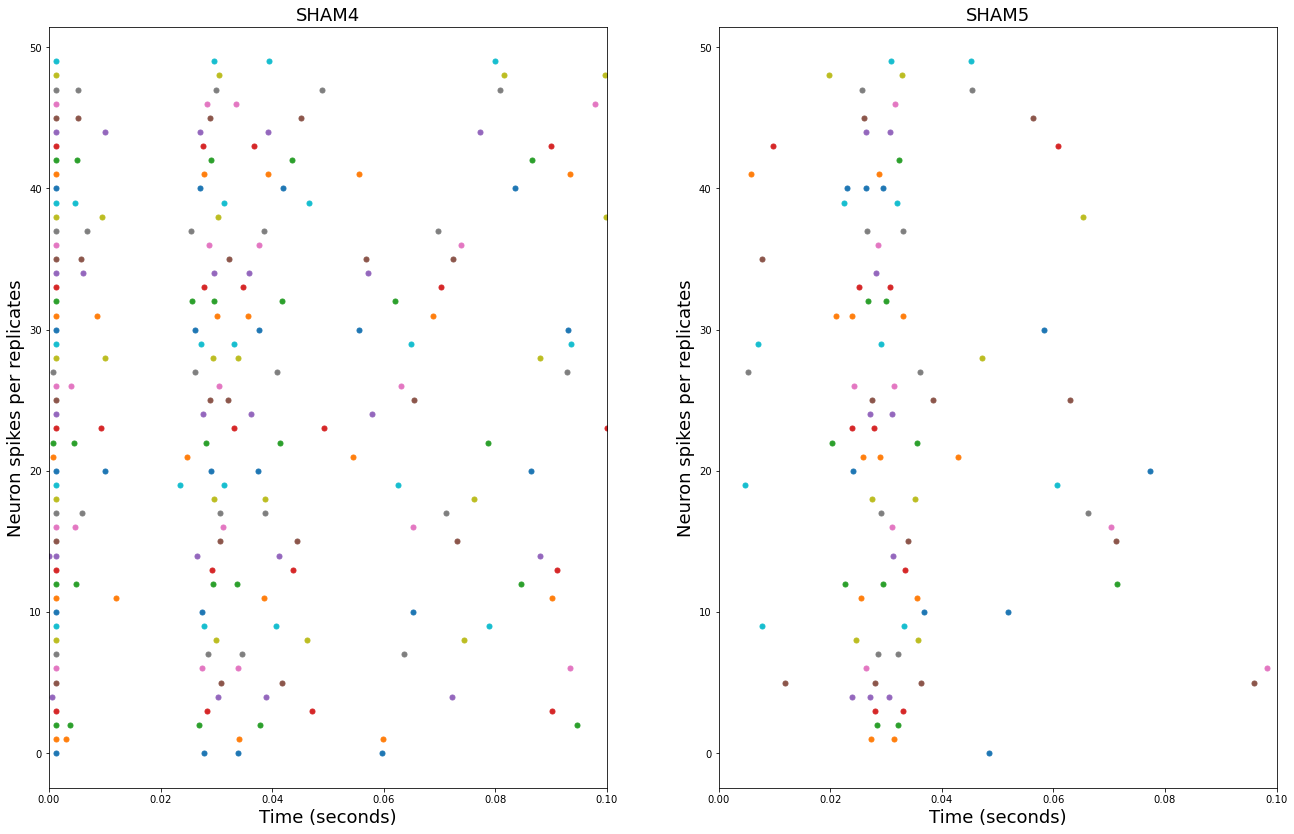

In [15]:
plt.figure(figsize=(22,14))

plt.subplot(1,2,1)
for i, spiketrain in enumerate(SHAM4_times):
        plt.plot(spiketrain, i * np.ones_like(spiketrain), '.', markersize=10)
        
plt.xlim(0, 0.10)
plt.title("SHAM4", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)

plt.subplot(1,2,2)

for i, spiketrain in enumerate(SHAM5_times):
        plt.plot(spiketrain, i * np.ones_like(spiketrain), '.', markersize=10)
        
plt.xlim(0, 0.10)
plt.title("SHAM5", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)

plt.show()

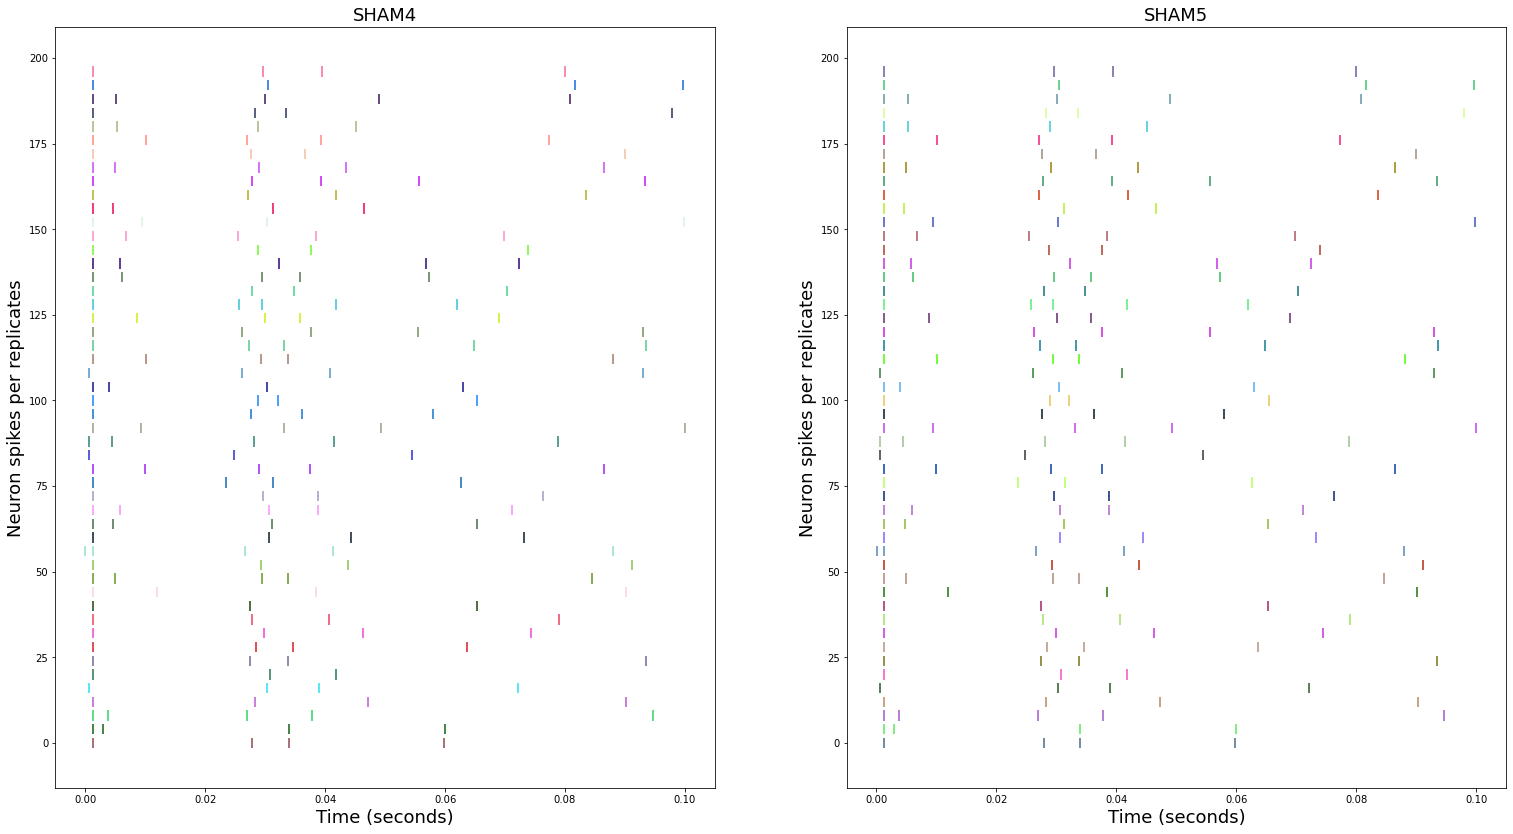

In [16]:
# Autre visualisation avec eventplot() :

plt.figure(figsize=(26,14))

plt.subplot(1,2,1)

colors = [ "#"+"".join([random.choice ("0123456789ABCDEF") for j in range(6)] )
           for i in range (len(SHAM4_times)) ]

plt.eventplot(SHAM4_times, color = colors,  lineoffsets = 4 , linelengths= 3)
plt.title("SHAM4", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)

plt.subplot(1,2,2)

colors = [ "#"+"".join([random.choice ("0123456789ABCDEF") for j in range(6)] )
           for i in range (len(SHAM5_times)) ]

plt.eventplot(SHAM4_times, color = colors, lineoffsets = 4 , linelengths= 3)
plt.title("SHAM5", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)

plt.show()

In [17]:
SHAM4_concat = np.concatenate(SHAM4_times)
SHAM5_concat = np.concatenate(SHAM5_times)

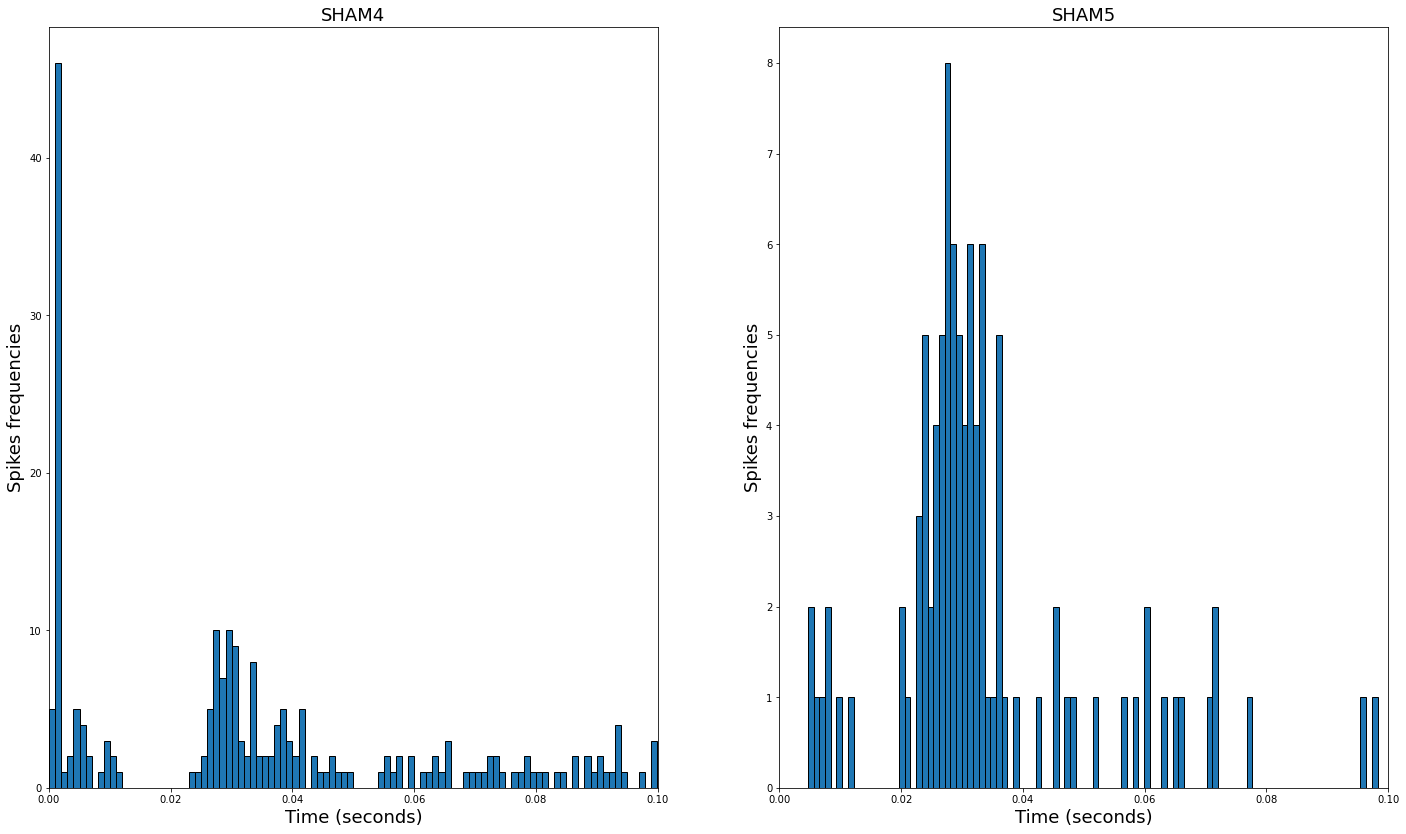

In [18]:
plt.figure(figsize=(24, 14))

plt.subplot(1,2,1)

plt.xlim(0, 0.1)
histogramme = plt.hist(SHAM4_concat, bins= 100, edgecolor="black")
plt.title("SHAM4", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)

plt.subplot(1,2,2)

plt.xlim(0, 0.1)
histogramme2 = plt.hist(SHAM5_concat, bins= 100, edgecolor="black")
plt.title("SHAM5", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)

plt.show()

In [19]:
from scipy.interpolate import interp1d

def estimate_lambda_inhomo (histogram, bins, T, scale = False):
    
    time = np.linspace(0.0001, T, num = bins, endpoint=True)
    counts = histogram[0] / 50 # 50 = nombre de réplicats
    interval_length = T/bins
    lambda_values = counts/interval_length
    
    if (scale == False):
        y = lambda_values
    elif (scale == True):
        y = lambda_values/max(lambda_values) #lambda(t) standardisé entre 0 et 1
        
    interp_lambda = interp1d(time,y, kind = "cubic")
    
    return (time, y, interp_lambda)

In [20]:
x4, y4, f4 = estimate_lambda_inhomo(histogramme, 100, 0.1)
x5, y5, f5 = estimate_lambda_inhomo(histogramme2, 100, 0.1)

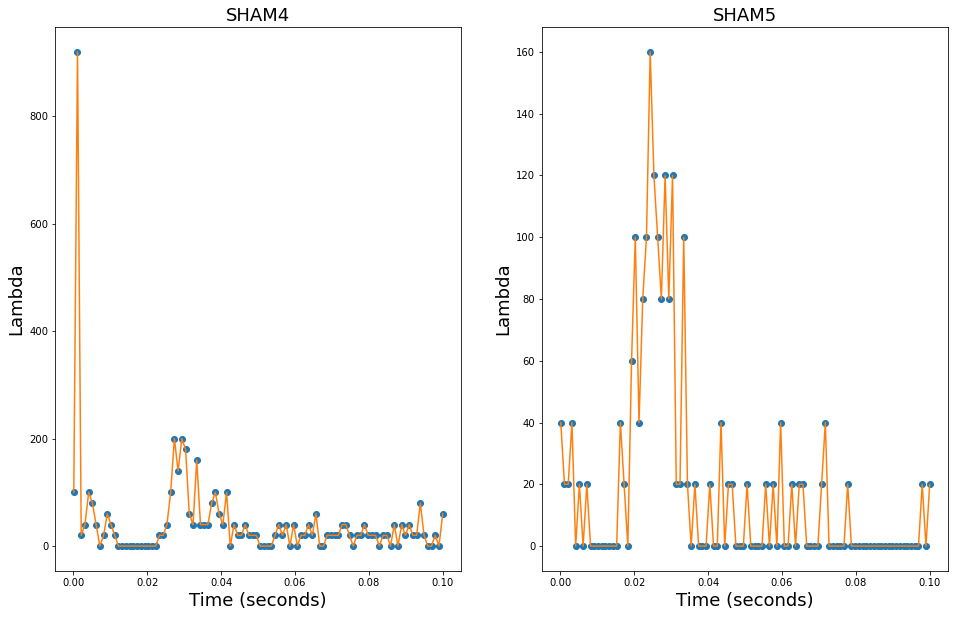

In [21]:
plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
plt.plot(x4, y4, 'o', x4, f4(x4))
plt.title("SHAM4", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Lambda", fontsize = 18)

plt.subplot(1, 2, 2)
plt.plot(x5, y5, 'o', x5, f5(x5))
plt.title("SHAM5", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Lambda", fontsize = 18)

plt.show()

### Non homogeneous poisson process :

$ P_{N_{[t_a, t_b]} } (k) = \frac { \left(  \int_{t_a}^{t_b} \lambda (t) dt   \right) ^ n }{ k!} \times e ^{- \int_{t_a}^{t_b} \lambda (t) dt }$

In [22]:
def generatorpoisson_inhomogen(my_funct, T):
    start = random.uniform(0, 0.001)
    end = T
    time = start
    time_list = [time]
    while (time < end):
        print(time)
        time += np.random.exponential( scale = 1/ my_funct(time))
        time_list.append(time)
    return (time_list)

In [23]:
#generatorpoisson_inhomogen(f, 10)

In [24]:
scale_x4, scale_y4, proba = estimate_lambda_inhomo(histogramme, 100, 0.1, scale=True)

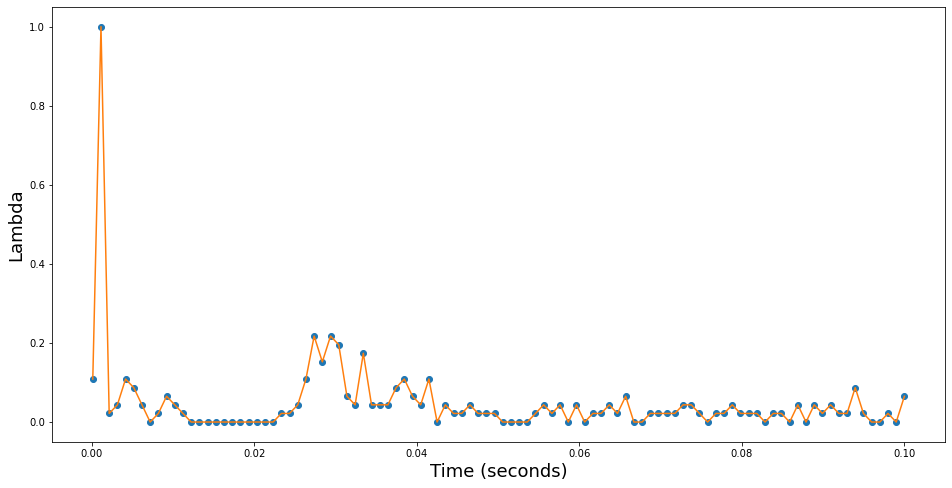

In [25]:
plt.figure(figsize=(16, 8))
plt.plot(scale_x4, scale_y4, 'o', scale_x4, proba(scale_x4), '-')
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Lambda", fontsize = 18)
plt.show()

In [26]:
# Générer un tirage aléatoire homogène d'une loi de poisson pour lambda = max de lambda(t):

def inhomogene_subdivision_poisson_generator (_lambda_, proba, T, list2return = 0):
    generator_list = poisson_generator(_lambda_, T)
    keep_list = [] #ceux qu'on garde
    garbage_list = [] #la poubelle
    proba_limite = 0.5
    
    for i in range(len(generator_list)) : 
        if proba(generator_list[i]) > proba_limite : 
            keep_list.append(generator_list[i])
        else : 
            garbage_list.append(generator_list[i])
            
    if list2return == 0 :
        return (keep_list)
    else :
        return (garbage_list)

In [27]:
def spiketrains_replicator (N, _lambda_, proba, T, list2return):
    new_SHAM = []
    for i in range(N):
        new_SHAM.append(inhomogene_subdivision_poisson_generator ( _lambda_, T, list2return))
        
    return (new_SHAM)

In [28]:
def max_lambda(histogram, bins, T):
    counts = histogram[0] / 50 
    interval_length = T / bins
    lambda_values = counts/interval_length
    
    return (max(lambda_values))

In [29]:
max_lambda_SHAM4 = max_lambda(histogramme, 100, 0.1)
max_lambda_SHAM5 = max_lambda(histogramme2, 100, 0.1)

In [30]:
my_SHAM_sup = spiketrains_replicator(1000, max_lambda_SHAM4, proba,  0.1, 0)
my_SHAM_inf = spiketrains_replicator(1000, max_lambda_SHAM4, proba,  0.1, 1)
my_concat_SHAM_sup = np.concatenate(my_SHAM_sup)
my_concat_SHAM_inf = np.concatenate(my_SHAM_inf)

TypeError: 'float' object is not callable

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
plt.xlim(0.0004, 0.0016)
plt.hist(my_concat_SHAM_sup, bins= 100, edgecolor="black")
plt.title("Incidents avec p > 0.5, pour 1000 réplicats")
plt.xlabel("Time (seconds)", fontsize = 16)
plt.ylabel("Spikes frequencies", fontsize = 14)

plt.subplot(1,2,2)
plt.xlim(0, 0.009)
plt.hist(my_concat_SHAM_inf, bins= 100, edgecolor="black")
plt.title("Incidents avec p < 0.5, pour 1000 réplicats")
plt.xlabel("Time (seconds)", fontsize = 16)
plt.ylabel("Spikes frequencies", fontsize = 15)

plt.show()

### Expériences un peu hors sujet (mais intéressantes):

In [ ]:
# On definit notre fonction lambda(t) pour la simulation non-homogène
def my_function(x):
    y =  math.log(0.5*x) - 0.9*math.cos(x) + math.exp(-0.825*x) - 0.25*x/2 +0.4

    return ( abs(y) )# car lambda doit appartenir à R*+

In [ ]:
def poisson_inhm_generator(T):
    time = np.linspace(0.01, 10, T)
    spikes = []
    lambda_ = []
    
    for t in time:
        lambda_.append( (my_function(t)) )
        
    for l in lambda_:
        spikes.append( sorted ( abs( (np.random.exponential(1/l, T) ) ) ) )
        
    return (spikes, lambda_)

In [ ]:
spikes, lambda1 = poisson_inhm_generator(100)
spikes_times = epochs(spikes, limit=0.1)
spikes_times2 = sorted( np.concatenate (spikes_times) )

In [ ]:
bins = np.linspace(0.01, max(spikes_times2), 120)
plt.figure(figsize=(12, 8))
plt.xlim(0.01, 0.1)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)
plt.hist(spikes_times2, bins = bins , edgecolor = "black" )

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lambda1)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Rate (lambda)", fontsize = 18)
plt.show()

In [ ]:
from scipy.stats import bernoulli
from collections import Counter

In [ ]:
time = np.linspace(0.01, 10, 100)
p_list = np.linspace(0, 1, 100)
eventsP = [] # nb de succés p
eventsQ = [] # nb echecs 1-p = q
probas = []

for t in time:
    p = round(random.choice(p_list), 3)
    rvs =  bernoulli.rvs(p, size = 100)
    probas.append(p)
    eventsP.append(Counter(rvs)[1]) 
    eventsQ.append(Counter(rvs)[0])

print("Les probabilites p : ", probas, "\n") 
print("Nombre de succes : ", eventsP, "\n") 
print("Nombre d'echecs : ", eventsQ)

In [ ]:
plt.figure(figsize=(26, 14))

plt.subplot(1,3,1)
plt.hist(eventsP, alpha=0.4, bins = 50, color = "blue", edgecolor = "darkblue")

plt.subplot(1,3,2)
plt.hist(eventsP, alpha=0.4, bins = 50, color = "blue", edgecolor = "darkblue")
plt.hist(eventsQ, alpha = 0.4, bins = 50, color = "orange", edgecolor = "darkorange")

plt.subplot(1,3,3)
plt.hist(eventsQ, alpha = 0.4, bins = 50, color = "orange", edgecolor = "darkorange")

plt.show()

In [ ]:
lambda_ = 0.5
lambdaP = []
lambdaQ = []

for p in probas:
    lambdaP.append(lambda_ * p)
    lambdaQ.append(lambda_ * (1- p))

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(1,2,1)
plt.plot(lambdaP, color = "blue")

plt.subplot(1,2,2)
plt.plot(lambdaQ, color="orange")

plt.show()